<a href="https://colab.research.google.com/github/aaditshukla98710/Data-Analysis/blob/main/Accenture_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
# Read the csv data
content = pd.read_csv("/content/Content.csv")
reaction = pd.read_csv("/content/Reactions.csv")
reactiontypes = pd.read_csv("/content/ReactionTypes.csv")

In [3]:
# Understand the data
content.head(5)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
reaction.head(5)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
reactiontypes.head(5)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
del content["Unnamed: 0"]
del reaction["Unnamed: 0"]
del reactiontypes["Unnamed: 0"]

In [7]:
content.head(2)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...


In [8]:
content["Category"].head(10)

0           Studying
1     healthy eating
2     healthy eating
3         technology
4               food
5            cooking
6               dogs
7         technology
8             soccer
9    public speaking
Name: Category, dtype: object

In [9]:
content["Category"]=content["Category"].astype(str)

In [10]:
def turn(x):
    x =x.replace('"', "")
    return x

content["Category"]=content["Category"].apply(lambda x : turn(x) )

In [11]:
content["Category"]

0             Studying
1       healthy eating
2       healthy eating
3           technology
4                 food
            ...       
995    public speaking
996         technology
997           veganism
998            culture
999         technology
Name: Category, Length: 1000, dtype: object

In [12]:
content = content.rename(columns={"Type":"Content Type"})


In [13]:
content.head()


,Content ID,User ID,Content Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [14]:
content.columns


Index(['Content ID', 'User ID', 'Content Type', 'Category', 'URL'], dtype='object')

In [15]:
reaction.columns


Index(['Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [16]:
reactiontypes.columns


Index(['Type', 'Sentiment', 'Score'], dtype='object')

In [17]:
del content["User ID"]
del reaction["User ID"]

In [18]:
reaction.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [19]:
content.head()

,Content ID,Content Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [20]:
reaction = reaction.merge(content[["Content ID",'Category']], left_on="Content ID", right_on="Content ID", how='inner')


In [21]:
reaction.head(3)


,Content ID,Type,Datetime,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,Studying


In [22]:
reaction = reaction.merge(reactiontypes[["Type",'Score']], left_on="Type", right_on="Type", how="inner")


In [23]:
reaction.head(3)


,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0


In [24]:
reactiontypes = reaction.copy()


In [25]:
reactiontypes


,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0
...,...,...,...,...,...
9789,91f7585b-c756-475b-9f21-877d7c48b579,adore,2021-06-09 08:11:09,soccer,72
9790,9a2c328f-16aa-490c-8ca2-c7deaa90db3f,adore,2020-12-21 13:03:26,culture,72
9791,9a2c328f-16aa-490c-8ca2-c7deaa90db3f,adore,2020-10-02 10:36:15,culture,72
9792,9a2c328f-16aa-490c-8ca2-c7deaa90db3f,adore,2020-07-29 13:57:13,culture,72


In [26]:
reactiontypes["Category"].max()


'veganism'

In [27]:
len(reactiontypes["Category"]=="veganism")

9794

In [28]:
reactiontypes.isnull().sum()

Content ID    0
Type          0
Datetime      0
Category      0
Score         0
dtype: int64

In [29]:
#Groupby calculation
reaction = reaction.groupby("Category")["Score"].sum()

In [30]:
reaction = reaction.sort_values(ascending=False)

In [31]:
reaction.to_csv("cleaned_data.csv")

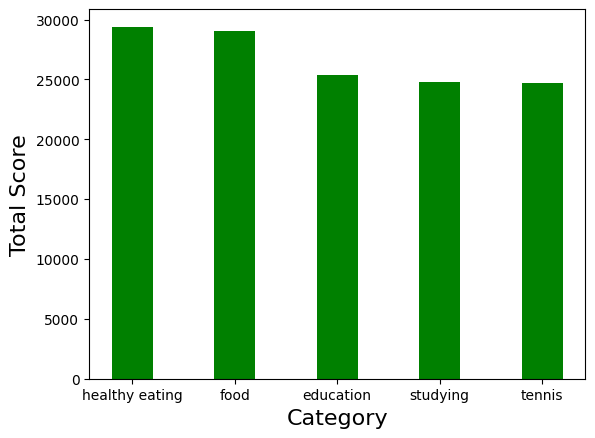

In [32]:
# Plot the values

y = reaction.values
y = y[:5]
x = reaction.index
x = x[:5]
plt.bar(x,y,width = 0.4,color="green")
plt.ylabel("Total Score",fontsize = 16,color="black")
plt.xlabel("Category",fontsize = 16,color="black")
plt.show()

In [33]:
reactiontypes


,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0
...,...,...,...,...,...
9789,91f7585b-c756-475b-9f21-877d7c48b579,adore,2021-06-09 08:11:09,soccer,72
9790,9a2c328f-16aa-490c-8ca2-c7deaa90db3f,adore,2020-12-21 13:03:26,culture,72
9791,9a2c328f-16aa-490c-8ca2-c7deaa90db3f,adore,2020-10-02 10:36:15,culture,72
9792,9a2c328f-16aa-490c-8ca2-c7deaa90db3f,adore,2020-07-29 13:57:13,culture,72


In [34]:
# Changing it to a respective date format
reactiontypes['Datetime'] = pd.to_datetime(reactiontypes['Datetime'] ,infer_datetime_format=True)

In [35]:
reactiontypes["Datetime"]


0      2020-11-07 09:43:50
1      2021-01-06 19:13:01
2      2021-04-09 02:46:20
3      2021-03-28 21:15:26
4      2020-08-04 05:40:33
               ...        
9789   2021-06-09 08:11:09
9790   2020-12-21 13:03:26
9791   2020-10-02 10:36:15
9792   2020-07-29 13:57:13
9793   2021-01-26 12:06:28
Name: Datetime, Length: 9794, dtype: datetime64[ns]

In [36]:
reactiontypes["Month"] = reactiontypes["Datetime"].dt.month


In [37]:
reactiontypes["Month"]


0       11
1        1
2        4
3        3
4        8
        ..
9789     6
9790    12
9791    10
9792     7
9793     1
Name: Month, Length: 9794, dtype: int64

In [38]:
data = reactiontypes.copy()


In [39]:
data.head()

,Content ID,Type,Datetime,Category,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8


In [40]:
data.isnull().sum()



Content ID    0
Type          0
Datetime      0
Category      0
Score         0
Month         0
dtype: int64

In [41]:
data["Count"] = data.groupby('Month')['Month'].transform('count')


In [42]:
data =data.drop_duplicates(subset=["Month"])


In [43]:
data.head()


,Content ID,Type,Datetime,Category,Score,Month,Count
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11,822
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1,866
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4,789
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3,800
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8,833


In [44]:
data.reset_index()


,index,Content ID,Type,Datetime,Category,Score,Month,Count
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11,822
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1,866
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4,789
3,3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3,800
4,4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8,833
5,7,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-02-11 20:10:20,dogs,0,2,773
6,8,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-05-27 01:44:22,public speaking,0,5,863
7,12,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-09-11 16:22:49,tennis,0,9,810
8,13,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-10-13 16:31:34,tennis,0,10,808
9,14,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-07-23 19:31:31,tennis,0,7,821


<function matplotlib.pyplot.show(close=None, block=None)>

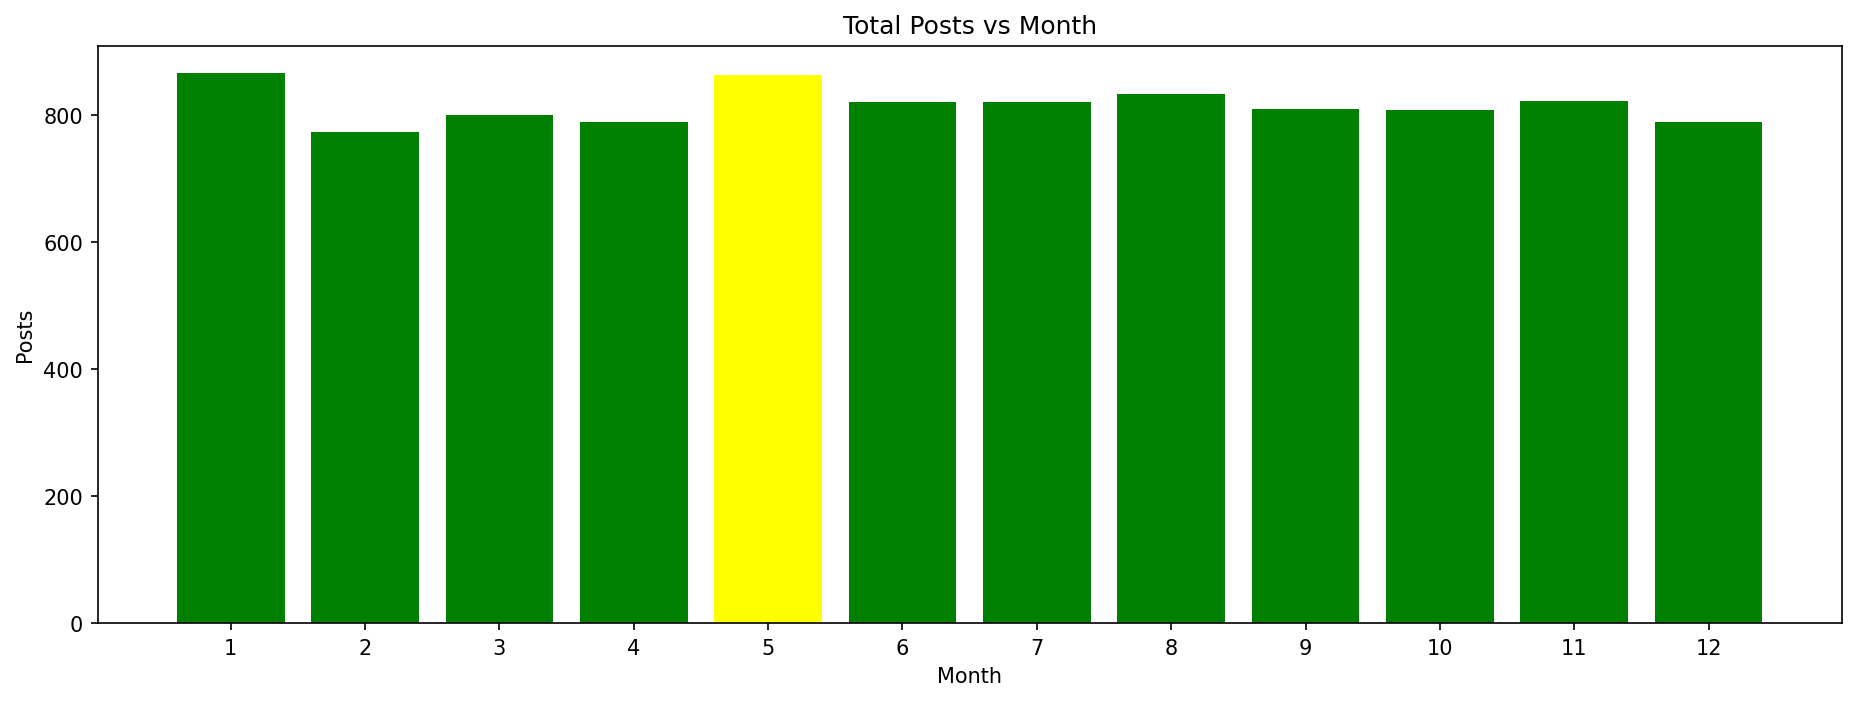

In [45]:
fig = plt.figure(figsize=(15,5), dpi = 150)
ax = plt.subplot()
x = data["Month"]
y = data["Count"]
ax.set_xticks(np.arange(13))
plt.title("Total Posts vs Month")
plt.xlabel("Month")
plt.ylabel("Posts")
colors = ["green" if i != 5 else "yellow" for i in x]
plt.bar(x, y,color=colors)
plt.show